Downloaded from https://www.kaggle.com/code/prathameshgadekar/book-genre-prediction-nlp/notebook

<h1 style="font-family:verdana;"> <center>Welcome to 📚Book Prediction 📈EDA and Prediction using Various Models:</center> </h1>

# Table of Contents :
* [1. Introduction](#section1)
* [2. Importing Required Libraries](#section2)
* [3. Data Exploration](#section3)
  - [Feature Description](#section31)
  - [Null Value Distribution](#section32)
  - [Data Cleaning](#section33)
  - [Important Observations](#section34)
* [4. Exploratory Data Analysis (EDA)](#section4)
  - [Count Histogram for each Label](#section41)
  - [WordCloud Analysis](#section42)
* [Modelling](#section5)
  - [Data Pre-Processing](#section51)
  - [Modelling Using OneVsRestClassifer](#section52)
  - [Modelling Without Using OneVsRestClassifer](#section53)
  - [Accuracy and Time-Taken Plots](#section54)
  - [Final Observations](#section55)

<a id="section1"></a>
# Introduction :
![Books](https://www.shutterstock.com/image-photo/book-600w-732217162.jpg)
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">We are given a dataset about various books. We are given features such as their <code>Name</code>,<code>Genre</code>,<code>Summary</code>. This is a multi class classification problem. Our main goal here is to predict the <code>Genre</code> of the book based on its <code>Title</code> and <code>Summary</code>.</p>

<a id="section2"></a>
# Importing Required Libraries :

In [3]:
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
clear_output()

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno #For missing value visualization

import plotly.offline as py
py.init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import time

In [3]:
#For NLP
import re
import nltk
import string
# from wordcloud import WordCloud

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
#For Calculation of Performance of Models
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score

In [5]:
#For Modelling Purpose
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

In [6]:
nltk.download('omw-1.4')
clear_output()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/elisealstad/nltk_data...


NameError: name 'clear_output' is not defined

<a id="section3"></a>
# Data Exploration :

<a id="section31"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">Feature Description:</h3>

<ol>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Index</code> - Index of every row.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Title</code> - Title of the Book .</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Genre</code> - Genre of the Book.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Summary</code> - Synopsis of the Book.</li>
</ol>
</div>

In [ ]:
data = pd.read_csv('assets/data.csv')
data.head()

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [ ]:
data.shape

(4657, 4)

In [ ]:
data.nunique()

index      4657
title      4296
genre        10
summary    4542
dtype: int64

<a id="section32"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">Null Value Distribution:</h3>

<AxesSubplot:>

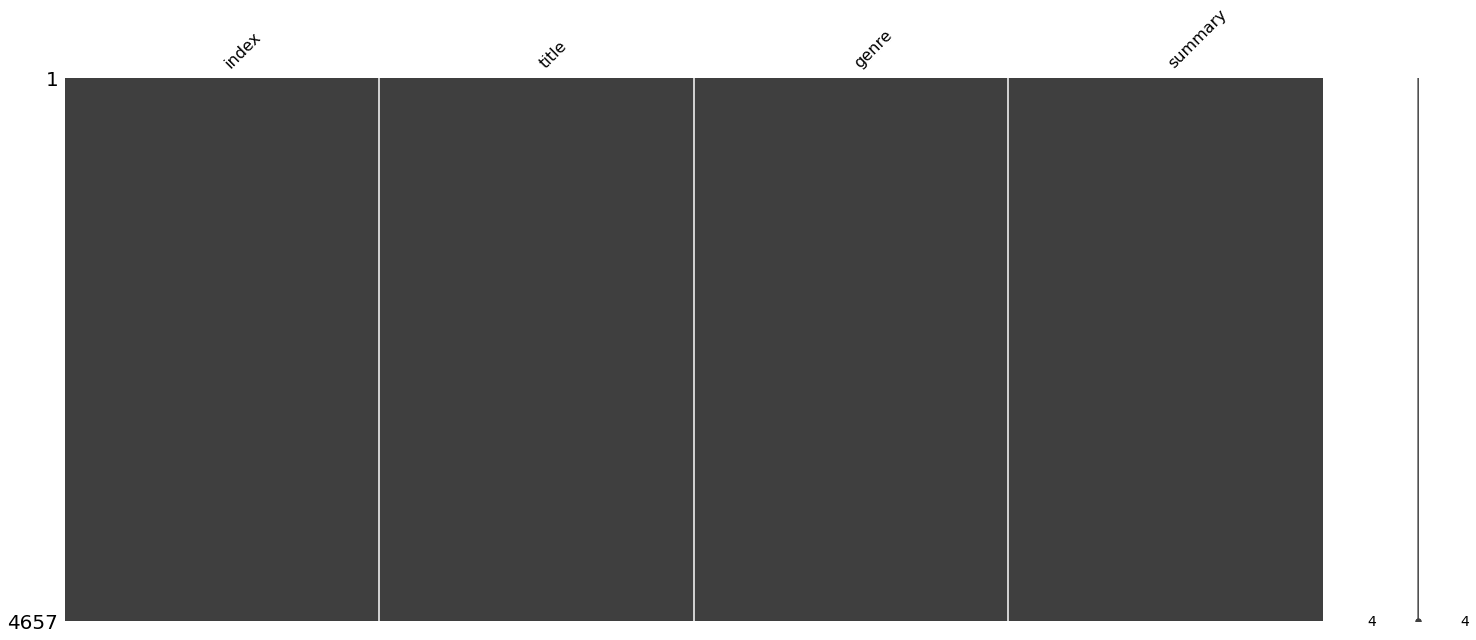

In [ ]:
msno.matrix(data)

<a id="section33"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">Data Cleaning:</h3>
    <p style="font-size:15px; font-family:verdana; line-height: 1.7em">We have no missing values in the data. We drop the <code>Index</code> column as it does not help describe the data in any way.</p>

In [ ]:
data.drop('index',inplace = True,axis = 1)
data.head()

,title,genre,summary
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Removing all stopwords, html tags and other unecessary things which may cause problem while modelling. Using SnowBall Stemmer, for stemming purpose.</p>

In [ ]:
#cleaning unecessary text from the string 
Stopwords = set(stopwords.words('english'))
def clean(text):
    text = text.lower() #Converting to lowerCase
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ',text) #removing punctuation
    
    text_tokens = word_tokenize(text) #removing stopwords
    tw = [word for word in text_tokens if not word in Stopwords]
    text = (" ").join(tw)
    
    splt = text.split(' ')
    output = [x for x in splt if len(x) > 3] #removing words with length<=3
    text = (" ").join(output)
    
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text) #removing single character 
    text = re.sub('<.*?>+',' ',text) #removing HTML Tags
    text = re.sub('\n', ' ',text) #removal of new line characters
    text = re.sub(r'\s+', ' ',text) #removal of multiple spaces
    return text

In [ ]:
data['summary'] = data['summary'].apply(clean)
data['title'] = data['title'].apply(clean)

<a id="section34"></a>
<div style="font-family:verdana;"><h3 style="font-family:verdana;">⭐Important Observations :</h3>
    <div class="alert alert-block alert-info">
* <i> There are total of <code>3</code> columns and <code>4657</code> rows in data.</i><br>
* <i> Data contains no missing value.</i><br>
* <i> We drop <code>Index</code> feature as it is of no use.</i><br>
        * <i> There are total of <code>10</code> genres.</i><br>
    </div>
    </div>

<a id="section4"></a>
# Exploratory Data Analysis:

In [ ]:
data['genre'].value_counts()

thriller      1023
fantasy        876
science        647
history        600
horror         600
crime          500
romance        111
psychology     100
sports         100
travel         100
Name: genre, dtype: int64

<a id="section41"></a>
<div style="font-family:verdana;"><h3 style="font-family:verdana">Count Histogram for each Label :</h3>

In [ ]:
genre_df = pd.DataFrame({'genre':['thriller','fantasy','science','history','horror','crime','romance',
                                'psychology','sports','travel'],'count':[1023,876,647,600,600,500,111,
                                                                        100,100,100]})
fig = px.histogram(genre_df,x = 'genre',y = 'count',color = 'genre')
fig.show()

<a id="section42"></a>
<div style="font-family:verdana;"><h3 style="font-family:verdana">WordCloud Analysis :</h3>

In [ ]:
def print_wordCloud(genre,summary):
    print(genre)
    wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(summary)
    plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
def make_string(genre):
    s = ""
    for row_index,row in data.iterrows():
        if(row['genre'] == genre):
            s+=(row['summary']+' ')
    return s
    

thriller


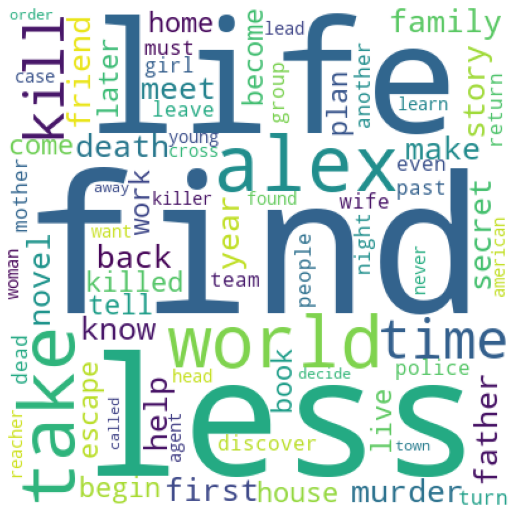

fantasy


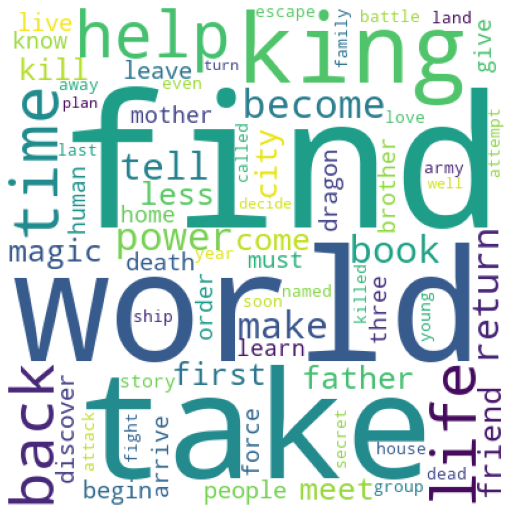

science


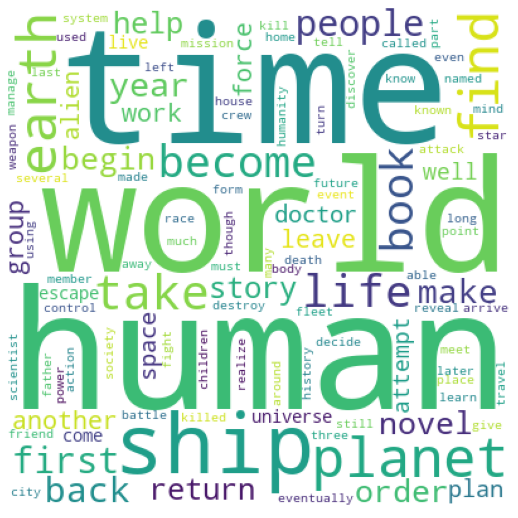

history


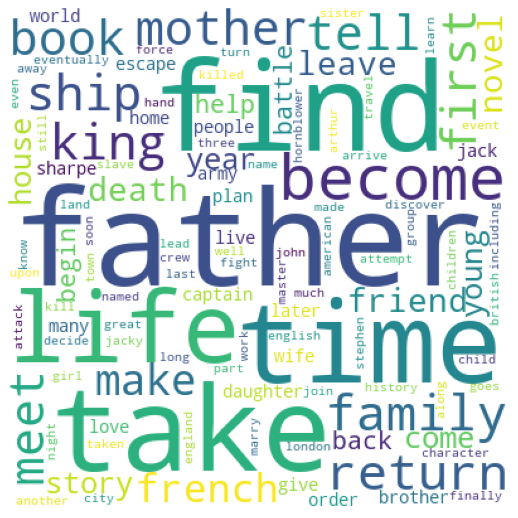

horror


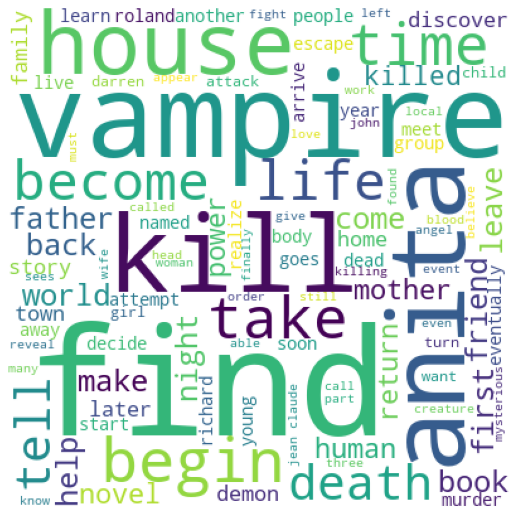

crime


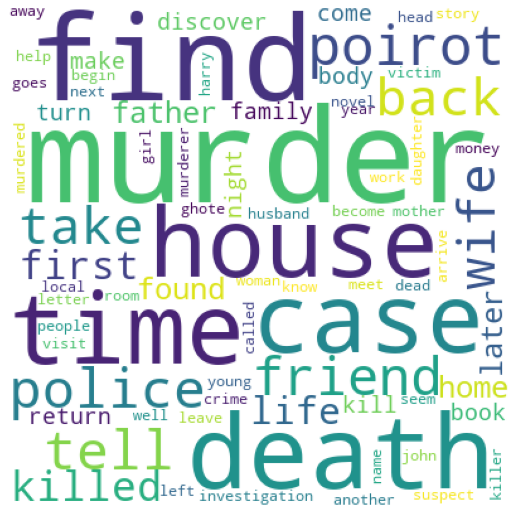

romance


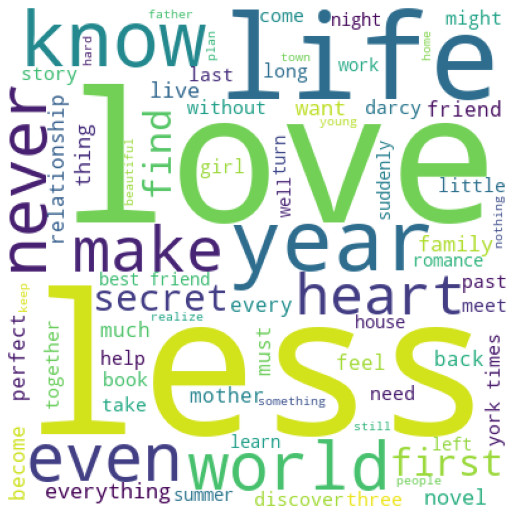

psychology


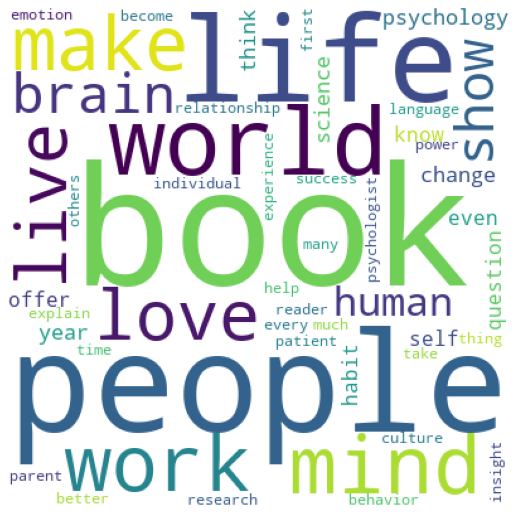

sports


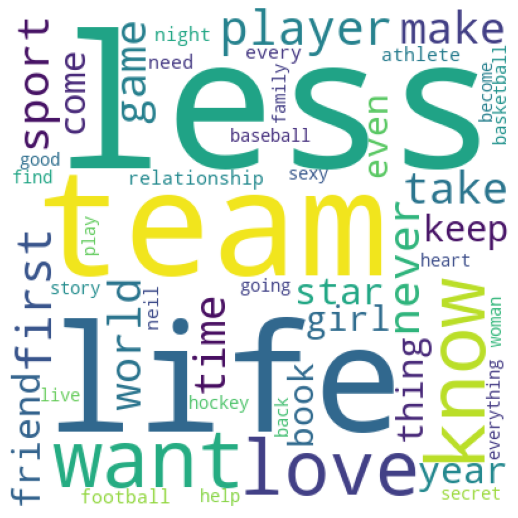

travel


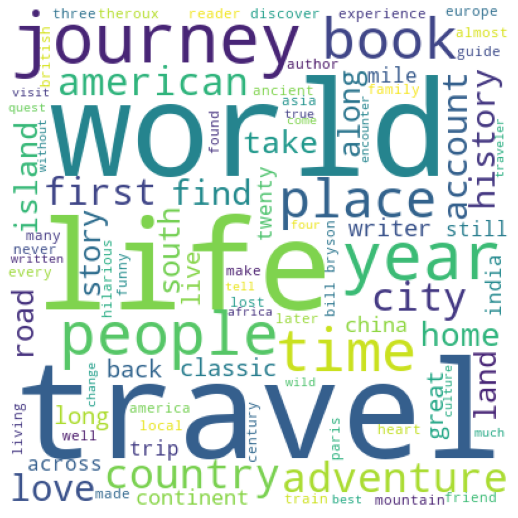

In [ ]:
genre = ['thriller','fantasy','science','history','horror','crime','romance',
                                'psychology','sports','travel']
for Genre in genre:
    summary = make_string(Genre)
    print_wordCloud(Genre,summary)

<a id="section5"></a>
# Modelling :

<a id="section51"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">Data Pre-Processing:</h3>

In [ ]:
def data_preprocessing(text):
    tokens = word_tokenize(text) #Tokenization
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens] #Lemmetization
    tokens = [SnowballStemmer(language = 'english').stem(word) for word in tokens] #Stemming
    return " ".join(tokens)

In [ ]:
data['summary'] = data['summary'].apply(data_preprocessing)
data['title'] = data['title'].apply(data_preprocessing)
data

,title,genre,summary
0,drown wednesday,fantasy,drown wednesday first truste among morrow day ...
1,lost hero,fantasy,book open jason awaken school unabl rememb any...
2,eye overworld,fantasy,cugel easili persuad merchant fianosth attempt...
3,magic promis,fantasy,book open herald mage vanyel return countri va...
4,taran wander,fantasy,taran gurgi return caer dallben follow event t...
...,...,...,...
4652,hound,fantasy,atticus sullivan last druid life peac arizona ...
4653,charli chocol factori,fantasy,charli bucket wonder adventur begin find willi...
4654,rise,fantasy,live dream child born free say like land fathe...
4655,frostbit,fantasy,rose love dimitri dimitri might love tasha mas...


In [ ]:
#Converting all the categorical features of 'genre' to numerical
data['genre'] = LabelEncoder().fit_transform(data['genre'])
data

,title,genre,summary
0,drown wednesday,1,drown wednesday first truste among morrow day ...
1,lost hero,1,book open jason awaken school unabl rememb any...
2,eye overworld,1,cugel easili persuad merchant fianosth attempt...
3,magic promis,1,book open herald mage vanyel return countri va...
4,taran wander,1,taran gurgi return caer dallben follow event t...
...,...,...,...
4652,hound,1,atticus sullivan last druid life peac arizona ...
4653,charli chocol factori,1,charli bucket wonder adventur begin find willi...
4654,rise,1,live dream child born free say like land fathe...
4655,frostbit,1,rose love dimitri dimitri might love tasha mas...


In [ ]:
X = CountVectorizer().fit_transform(data['summary'])
y = data['genre']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
models = [BernoulliNB(),MultinomialNB(),SGDClassifier(),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),
         AdaBoostClassifier(),SVC(),DummyClassifier(),ExtraTreeClassifier(),KNeighborsClassifier()]

<a id="section52"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">Modelling Using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html">OneVsRestClassifier</a>:</h3>

In [ ]:
Name = []
Accuracy = []
Precision = []
F1_Score = []
Recall = []
Time_Taken = []
for model in models:
    name = type(model).__name__
    Name.append(name)
    model = OneVsRestClassifier(model)
    begin = time.time()
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    end = time.time()
    Accuracy.append(accuracy_score(prediction,y_test))
    Precision.append(precision_score(prediction,y_test,average = 'macro'))
    Recall.append(recall_score(prediction,y_test,average = 'macro'))
    F1_Score.append(f1_score(prediction,y_test,average = 'macro'))
    Time_Taken.append(end-begin)
    print(name + ' Successfully Trained')

BernoulliNB Successfully Trained
MultinomialNB Successfully Trained
SGDClassifier Successfully Trained
LogisticRegression Successfully Trained
RandomForestClassifier Successfully Trained
GradientBoostingClassifier Successfully Trained
AdaBoostClassifier Successfully Trained
SVC Successfully Trained
DummyClassifier Successfully Trained
ExtraTreeClassifier Successfully Trained
KNeighborsClassifier Successfully Trained


In [ ]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Precision_score':Precision,'Recall_score':Recall,
        'F1_score':F1_Score,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Precision_score,Recall_score,F1_score,Time Taken
0,BernoulliNB,0.414163,0.248558,0.380560,0.251805,0.163532
1,MultinomialNB,0.642704,0.431259,0.539751,0.431900,0.087647
2,SGDClassifier,0.664163,0.664121,0.599181,0.623536,1.018068
3,LogisticRegression,0.697425,0.646774,0.714836,0.669827,19.043084
4,RandomForestClassifier,0.637339,0.492217,0.681676,0.528337,81.691239
5,GradientBoostingClassifier,0.613734,0.509234,0.581919,0.526031,196.213753
6,AdaBoostClassifier,0.592275,0.566141,0.609691,0.581096,78.247208
7,SVC,0.649142,0.595520,0.710517,0.620398,94.895187
8,DummyClassifier,0.198498,0.100000,0.019850,0.033124,0.009578
9,ExtraTreeClassifier,0.254292,0.262277,0.310574,0.248297,1.933650


<a id="section53"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">Modelling Without Using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html">OneVsRest Classifier</a>:</h3>

In [ ]:
Name = []
Accuracy = []
Precision = []
F1_Score = []
Recall = []
Time_Taken = []
for model in models:
    name = type(model).__name__
    Name.append(name)
    begin = time.time()
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    end = time.time()
    Accuracy.append(accuracy_score(prediction,y_test))
    Precision.append(precision_score(prediction,y_test,average = 'macro'))
    Recall.append(recall_score(prediction,y_test,average = 'macro'))
    F1_Score.append(f1_score(prediction,y_test,average = 'macro'))
    Time_Taken.append(end-begin)
    print(name + ' Successfully Trained')

BernoulliNB Successfully Trained
MultinomialNB Successfully Trained
SGDClassifier Successfully Trained
LogisticRegression Successfully Trained
RandomForestClassifier Successfully Trained
GradientBoostingClassifier Successfully Trained
AdaBoostClassifier Successfully Trained
SVC Successfully Trained
DummyClassifier Successfully Trained
ExtraTreeClassifier Successfully Trained
KNeighborsClassifier Successfully Trained


In [ ]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Precision_score':Precision,'Recall_score':Precision,
        'F1_score':F1_Score,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Precision_score,Recall_score,F1_score,Time Taken
0,BernoulliNB,0.415236,0.250011,0.250011,0.259236,0.033673
1,MultinomialNB,0.649142,0.422862,0.422862,0.419314,0.020227
2,SGDClassifier,0.645923,0.629718,0.629718,0.596582,0.852236
3,LogisticRegression,0.697425,0.641282,0.641282,0.670599,16.981547
4,RandomForestClassifier,0.579399,0.445222,0.445222,0.471017,22.460937
5,GradientBoostingClassifier,0.605150,0.511471,0.511471,0.532706,197.310268
6,AdaBoostClassifier,0.266094,0.166475,0.166475,0.111523,7.917653
7,SVC,0.494635,0.310647,0.310647,0.315395,32.227146
8,DummyClassifier,0.198498,0.100000,0.100000,0.033124,0.000778
9,ExtraTreeClassifier,0.272532,0.254181,0.254181,0.256689,0.417510


<a id="section54"></a>
<div style="font-family:verdana;"><h3 style="font-family:verdana;">Accuracy and Time-Taken Plots :</h3>

In [ ]:
model_df.sort_values(by = 'Accuracy',ascending = False,inplace = True)
fig = px.line(model_df, x="Name", y="Accuracy", title='Accuracy VS Model')
fig.show()

In [ ]:
model_df.sort_values(by = 'Time Taken',ascending = False,inplace = True)
fig = px.line(model_df, x="Name", y="Time Taken", title='Time Taken VS Model')
fig.show()

<a id="section55"></a>
<div style="font-family:verdana;"><h3 style="font-family:verdana;">Final Observations :</h3>
    <div class="alert alert-block alert-warning">
   <p style="font-size:15px; font-family:verdana; line-height: 1.7em">1. The most common words occuring for each <code>Genre</code> are:<br>
        * <i> <code>Thriller</code> ---> <code>Life</code>,<code>Find</code>,<code>Less</code>.</i><br>
        * <i> <code>Fantasy</code> ---><code>Take</code> <code>Find</code>,<code>World</code>,<code>King</code>.</i><br>
        * <i> <code>Science</code> ---> <code>World</code>,<code>Time</code>,<code>Human</code>.</i><br>
        * <i> <code>History</code> ---> <code>Take</code>,<code>Father</code>,<code>Become</code>.</i><br>
        * <i> <code>Horror</code> ---> <code>Kill</code>,<code>Find</code>,<code>Vampire</code>.</i><br>
        * <i> <code>Crime</code> ---> <code>Murder</code>,<code>Death</code>.</i><br>
        * <i> <code>Romance</code> ---> <code>Life</code>,<code>Love</code>,<code>Less</code>.</i><br>
        * <i> <code>Psychology</code> ---> <code>Life</code>,<code>Book</code>,<code>People</code>.</i><br>
        * <i> <code>Sports</code> ---> <code>Life</code>,<code>Team</code>,<code>Less</code>.</i><br>
        * <i> <code>Travel</code> ---> <code>Life</code>,<code>World</code>,<code>Travel</code>,<code>Journey</code>.</i></p><br>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">2. <code>Multinomial Naive Bayes</code> model works best for this datasetand also the time taken by <code>MultinomialNB</code> is significantly less.</p><br></div></div>
